Phantom package is designed to investigate the heterogeneous gene sets in time-course data. There are two different modes of Phantom analysis: Individual gene set mode and batch mode.

In [ ]:
#BiocManager::install("phantom")

In [3]:
library(phantom)

Warning message:
"package 'phantom' was built under R version 3.5.3"

# Data input

The data file should be a CSV file that follows these three rules:

    1). The first cell (row 1, column A) of the CSV file must be ‘gene_symbol’;

    2). The row names of the file must be the official gene symbols and should be unique;

    3). The columns should be ordered according to time.

![phantom1.png](picture/phantom1.png)

In [17]:
# load in data set
time.course.data = load.data("GSE52428.csv")

In [18]:
head(time.course.data)

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16
NAT2,2.259996,1.657782,1.7681250,2.950019,0.8933544,2.348802,1.695401,2.586248,2.121075,1.9909657,2.974225,2.802917,2.180619,2.217994,1.208449,2.209098
ADA,9.383220,9.769721,9.6215153,9.972477,9.2971318,10.072950,8.534062,9.443215,10.201536,10.2954820,10.336942,10.246586,10.929355,10.475399,10.212740,10.443120
CDH2,1.964964,2.736393,0.6173173,3.445766,1.0248657,7.172638,1.885824,1.559056,3.516772,0.9983255,5.966652,2.478490,1.784579,4.825073,1.354847,1.055411
AKT3,8.192801,8.386639,7.1447092,7.383454,7.4187718,7.235153,6.720634,6.936061,6.683823,7.2399994,7.812440,8.158281,7.496790,7.076965,7.617592,7.777341
MED6,7.534069,7.714891,7.0771041,7.611084,7.8028459,6.302995,7.137688,6.927956,6.986934,6.8661167,7.411977,8.057320,7.071838,7.896345,7.806550,7.624459
NR2E3,3.466614,1.692927,4.8827066,2.415634,4.6556838,5.017142,5.327533,4.034885,3.280551,0.8799096,2.859077,4.094954,4.059900,1.655750,1.268680,3.869013


In [20]:
class(time.course.data)

[1] "matrix"

# geneset input

The gene set used in the analysis can be downloaded from GSEA MSigDB website http://software.broadinstitute.org/gsea/msigdb (Download the GMT files with gene symbols), and load in with the function `load.geneset()`:

In [21]:
# load in geneset 
geneset = load.geneset("c2.cp.kegg.v6.2.symbols.gmt")

Here we download [CP:KEGG: KEGG gene sets](http://software.broadinstitute.org/gsea/msigdb/download_file.jsp?filePath=/resources/msigdb/6.2/c2.cp.kegg.v6.2.symbols.gmt).

In [22]:
class(geneset)
length(geneset)
geneset[[1]]

[1] "list"

[1] 186

$geneset_type
[1] "c2.cp.kegg.v6.2.symbols.gmt"

$geneset_name
[1] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS"

$geneset_member
 [1] "ACSS2"   "GCK"     "PGK2"    "PGK1"    "PDHB"    "PDHA1"   "PDHA2"  
 [8] "PGM2"    "TPI1"    "ACSS1"   "FBP1"    "ADH1B"   "HK2"     "ADH1C"  
[15] "HK1"     "HK3"     "ADH4"    "PGAM2"   "ADH5"    "PGAM1"   "ADH1A"  
[22] "ALDOC"   "ALDH7A1" "LDHAL6B" "PKLR"    "LDHAL6A" "ENO1"    "PKM2"   
[29] "PFKP"    "BPGM"    "PCK2"    "PCK1"    "ALDH1B1" "ALDH2"   "ALDH3A1"
[36] "AKR1A1"  "FBP2"    "PFKM"    "PFKL"    "LDHC"    "GAPDH"   "ENO3"   
[43] "ENO2"    "PGAM4"   "ADH7"    "ADH6"    "LDHB"    "ALDH1A3" "ALDH3B1"
[50] "ALDH3B2" "ALDH9A1" "ALDH3A2" "GALM"    "ALDOA"   "DLD"     "DLAT"   
[57] "ALDOB"   "G6PC2"   "LDHA"    "G6PC"    "PGM1"    "GPI"

# Get the names of genesrts

We use `geneset.names()` function:

In [23]:
# print the names of genesets
g.names = geneset.names(geneset)
head(g.names)

[1] "KEGG_GLYCOLYSIS_GLUCONEOGENESIS"              
[2] "KEGG_CITRATE_CYCLE_TCA_CYCLE"                 
[3] "KEGG_PENTOSE_PHOSPHATE_PATHWAY"               
[4] "KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS"
[5] "KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM"         
[6] "KEGG_GALACTOSE_METABOLISM"

# Run phantom analysis

We chose the pathway `'KEGG_GLYCOLYSIS_GLUCONEOGENESIS'` to run phantom analysis.

parameter | description
--------|-----------
data	|User provided time-course data loaded by load.data()
geneset_list	|User provided genesets list loaded by load.geneset(). Phanotm package provids four geneset lists from different resources: kegg, reactome, emory geneset and baylor modules. These genesets can be obtained with data(), e.g. data(kegg.geneset)
query_geneset	|The name of a geneset user wants to analysis. This geneset should be from the geneset_list designated by geneset_list parameter
ncluster	|The number of clusters within a geneset user wants to use to identify the heterogeneity of this geneset.
nsample	|The times of random sampling that is used to build the NULL distribution for parato front analysis.

Gene set: KEGG_GLYCOLYSIS_GLUCONEOGENESIS
Time used for clustering random samples: 0.22 
Time used for random sampling: 0.25 
Time used for pareto front test: 0.1 
0.046 


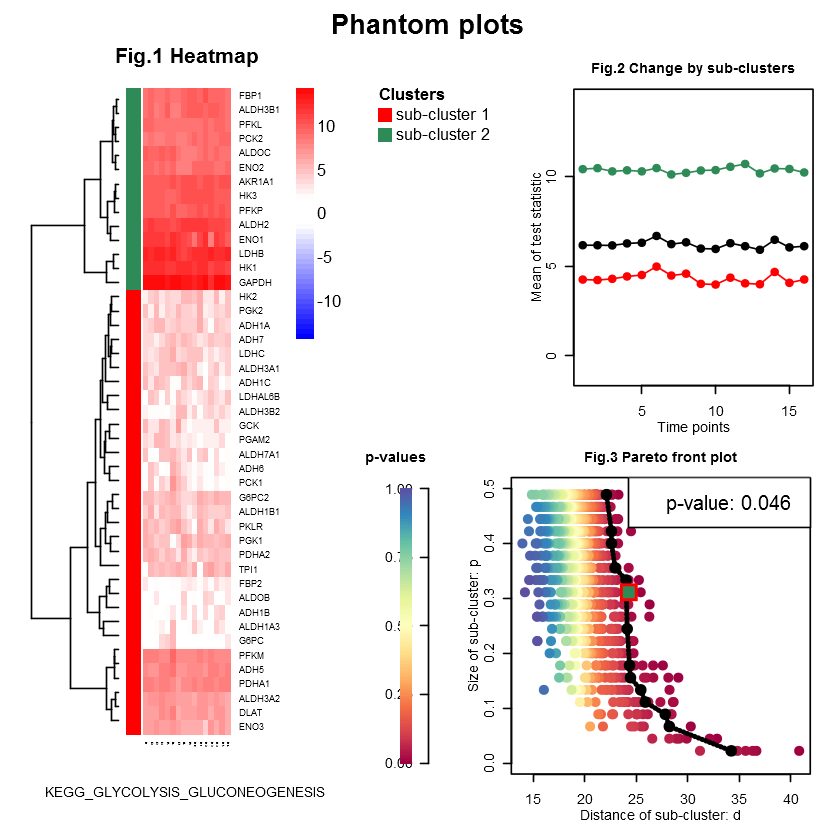

In [24]:
obj = run.phantom(data = time.course.data, geneset_list = geneset,
query_geneset='KEGG_GLYCOLYSIS_GLUCONEOGENESIS', ncluster = 2, nsample = 1000)

# Run phantom batch analysis

parameter | description
--------|-----------
data	|User provided time-course data loaded by load.data()
geneset_list	|User provided genesets list loaded by load.geneset(). Phanotm package provids four geneset lists from different resources: kegg, reactome, emory geneset and baylor modules. These genesets can be obtained with data(), e.g. data(kegg.geneset)
maxncluster	|The maximum number of clusters within a geneset user wants to test with. All numbers from 1 to ncluster will be tested and an optimal cluster number will be selected to identify the heterogeneity of this geneset.
nsample	|The times of random sampling that is used to build the NULL distribution for parato front analysis.
report_pval	|The maximum p value of a geneset that will be reported as a significant heterogeneous geneset. Genesets with p value larger than report_pval wil not be reported
report_nmin	|The minmum size of subcluster in a geneset that will be reported as a significant heterogeneous geneset.
output_dir	|The directory where user wants to put the phantom batch analysis results

In [25]:
obj = run.phantom.batch(data = time.course.data, geneset_list = geneset,
                  maxncluster = 5, nsample = 1000, report_pval = 0.05, report_nmin = 5,
                  output_dir = file.path(getwd(),'/phantom_result'))

k= 2 id= 1 
Gene set: KEGG_GLYCOLYSIS_GLUCONEOGENESIS
Time used for clustering random samples: 0.28 
Time used for random sampling: 0.3 
Time used for pareto front test: 0 
0.028 
k= 3 id= 1 
Gene set: KEGG_GLYCOLYSIS_GLUCONEOGENESIS
Re-using random samples for size:  45 
Time used for clustering random samples: 0.01 
Time used for random sampling: 0.01 
Time used for pareto front test: 0.02 
0.034 
k= 4 id= 1 
Gene set: KEGG_GLYCOLYSIS_GLUCONEOGENESIS
Re-using random samples for size:  45 
Time used for clustering random samples: 0.01 
Time used for random sampling: 0.01 
Time used for pareto front test: 0.02 
0 
k= 5 id= 1 
Gene set: KEGG_GLYCOLYSIS_GLUCONEOGENESIS
Re-using random samples for size:  45 
Time used for clustering random samples: 0.01 
Time used for random sampling: 0.03 
Time used for pareto front test: 0.01 
0.155 
k= 2 id= 2 
Gene set: KEGG_CITRATE_CYCLE_TCA_CYCLE
Time used for clustering random samples: 0.13 
Time used for random sampling: 0.14 
Time used for pareto

You can see the result in `phantom_result` folder.

# Reference

[An Introduction to Phantom](https://cran.r-project.org/web/packages/phantom/vignettes/my-vignette.html)